# **Exercise 3: XGBoost**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
# Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

# XGBoost 
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance, to_graphviz, plot_tree
print("XGBoost version:",xgboost.__version__)

mycmap = "winter"
mpl.rcParams['image.cmap'] = mycmap
plt.rcParams['font.size'] = 13

XGBoost version: 2.0.3


In [2]:
np.random.seed(12345)

# import and read data
dname="./DATA/"
str0="_XGB_24.dat"
fnamex=dname+'x'+str0
fnamey=dname+'y'+str0
x = np.loadtxt(fnamex, delimiter=" ",dtype=float)
y = np.loadtxt(fnamey)
y = y.astype(int)
N,L = len(x), len(x[0])

# split data in training and test
N_train = int(0.75*N)
x_train,y_train = x[:N_train],y[:N_train]
x_test,y_test = x[N_train:],y[N_train:]
print(f"N={N}, N_train={N_train}, L={L}")

N=4000, N_train=3000, L=4


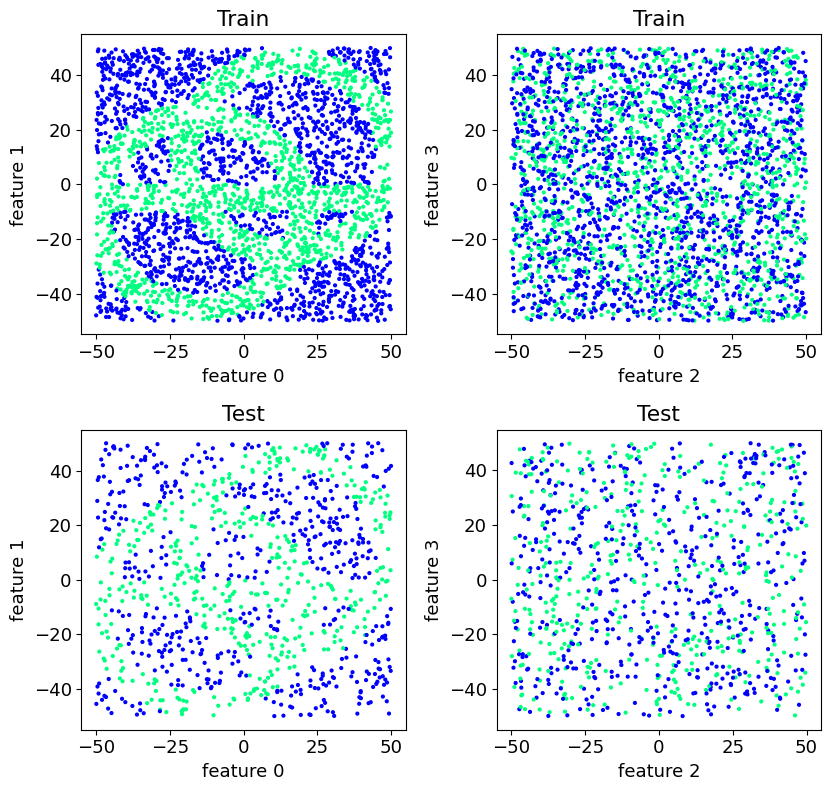

In [3]:
# visualize dataset
def scat(ax,x,y,i=0,j=1,s=4,title=""):
    ax.scatter(x[:,i],x[:,j],s=s,c=y)
    ax.set_xlabel(f"feature {i}")
    ax.set_ylabel(f"feature {j}")
    ax.set_title(title)

fig,AX = plt.subplots(2,2,figsize=(8.5,8.1))
scat(AX[0,0],x_train,y_train,title="Train")
scat(AX[0,1],x_train,y_train,i=2,j=3,title="Train")
scat(AX[1,0],x_test,y_test,title="Test")
scat(AX[1,1],x_test,y_test,i=2,j=3,title="Test")
fig.tight_layout()
plt.show()

In [16]:
def classify(data_x_train, data_y_train, data_x_test, data_y_test, clf=GradientBoostingClassifier(), show=False):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default?)
    clf.fit(data_x_train,data_y_train)
    
    print("error on test set: {:.2f}%   Accuracy on test set={:.3f}".format(100*(1-clf.score(data_x_test, data_y_test)),clf.score(data_x_test, data_y_test)))
    # S=50
    # dx = 1
    # x_seq=np.arange(-S,S+dx,dx)
    # nx = len(x_seq)
    # ll = x_train.shape[1]
    # x_plot=np.zeros((nx*nx,ll))
    # q=0
    # for i in range(nx):
    #     for j in range(nx):
    #         x_plot[q,:2] = [x_seq[i],x_seq[j]]
    #         q+=1
    # y_plot= clf.predict(x_plot)

    # fig,AX = plt.subplots(1,2,figsize=(8.2,4))
    # scat(AX[0],x_plot[:],y_plot,s=dx,title="predicted")
    # scat(AX[1],data_x_train[:],data_y_train,title="training set")
    # fig.tight_layout()
    # plt.show()
    
    if show:      
        dump_list = clf.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(2,1,figsize=(12, 5))
        for i in range(min(2,num_trees)):
            ax=AX[i]
            plot_tree(clf, num_trees=i, ax=ax)
        fig.savefig("DATA/tree-classif.png", dpi=400, pad_inches=0.02)   
        plt.show()

### Classify
If the “objective” hyperparameter is left unspecified, XGBClassifier looks at the data and chooses automatically the loss functions and the evaluation metrics (--> WARNING)

## XGBoost
https://xgboost.readthedocs.io/en/stable/python/python_api.html

In [17]:
model = XGBClassifier(seed=1,
                      objective='binary:logistic') 
       # importance_type="gain" #weight, cover, ...
       # learning_rate=0.4,
       # reg_lambda=0.001, 
       # n_estimators=30)

classify(x_train, y_train, x_test, y_test, model, show=False)

error on test set: 5.20%   Accuracy on test set=0.948


None
[0.4891835  0.37623835 0.06590363 0.06867457]


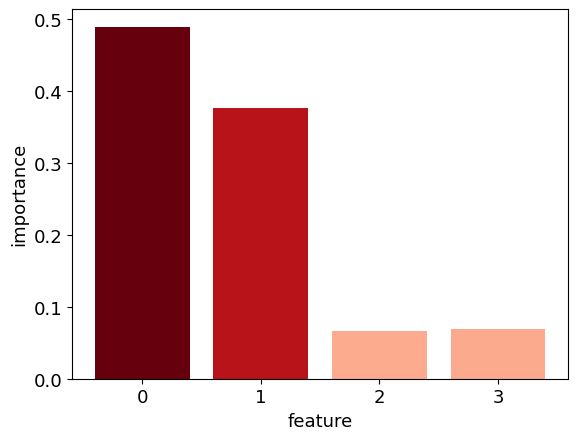

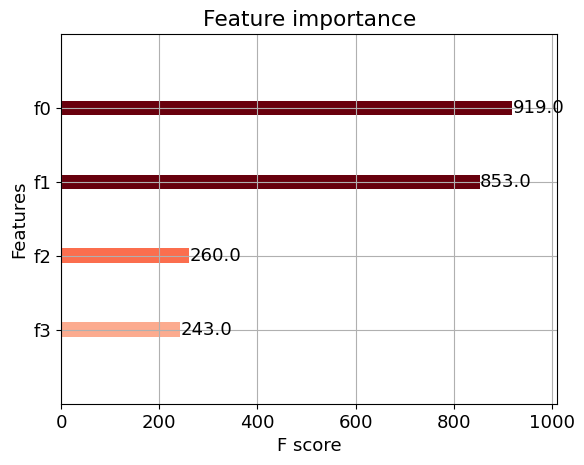

In [18]:
# https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
# feature importance

print(model.importance_type)
print(model.feature_importances_)
# plot
my_cmap = plt.get_cmap("Reds")
rescale = lambda y: 0.3 + 0.7 * (y - np.min(y)) / (np.max(y) - np.min(y))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_,
        color=my_cmap(rescale(model.feature_importances_)))
plt.xlabel("feature")
plt.ylabel("importance")
plt.xticks(np.arange(L))
plt.title(model.importance_type)
plt.show()

rescale_r = lambda y: 0.3 + 0.7 * (np.max(y) - y) / (np.max(y) - np.min(y))
plot_importance(model,color=my_cmap(rescale_r(model.feature_importances_)))
plt.show()

Documentation: https://xgboost.readthedocs.io/en/stable/python/python_api.html

    ‘weight’: the number of times a feature is used to split the data across all trees.

    ‘gain’: the average gain across all splits the feature is used in.

    ‘cover’: the average coverage across all splits the feature is used in.

    ‘total_gain’: the total gain across all splits the feature is used in.

    ‘total_cover’: the total coverage across all splits the feature is used in.


0 weight [919. 853. 260. 243.]
1 gain [4.56883669 3.5139606  0.61552143 0.64140123]
2 total_gain [4198.76074219 2997.40844727  160.03556824  155.86050415]
3 cover [49.8643837  66.05692291 54.26316071 54.39147949]
4 total_cover [45825.3671875  56346.5546875  14108.421875   13217.12988281]


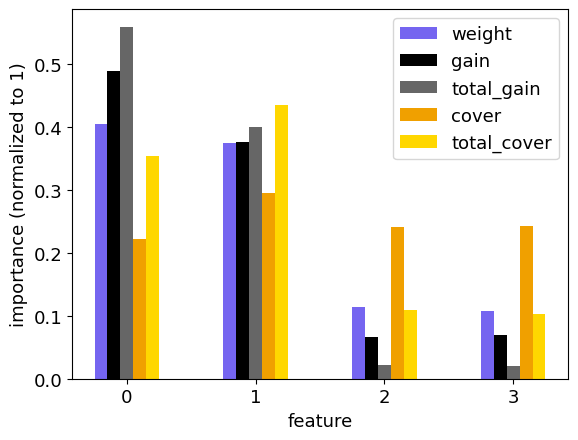

In [19]:
# if the importance type is “total_gain”, then the score is sum of loss change for each split from all trees.
list_type=["weight","gain","total_gain","cover","total_cover"]
list_col=["#7565F0","k","#666666","#F0A000","gold"]

for i,t in enumerate(list_type):
    feature_imp = model.get_booster().get_score(importance_type=t)
    keys = list(feature_imp.keys())
    values = np.array(list(feature_imp.values()))
    print(i,t,values)
    values= values/np.sum(values)
    plt.bar(np.arange(L)+(i-L/2)/10, values,color=list_col[i],width=0.1,label=t)
plt.xlabel("feature")
plt.ylabel("importance (normalized to 1)")
plt.xticks(np.arange(L))
plt.legend()
plt.show()

## normal Gradient Boosting

In [20]:
# GradientBoostingClassifier()
classify(x_train, y_train, x_test, y_test)

error on test set: 19.50%   Accuracy on test set=0.805


## AdaBoost

In [21]:
classify(x_train, y_train, x_test, y_test, clf=AdaBoostClassifier())

error on test set: 34.10%   Accuracy on test set=0.659


/Users/giuliadoda/anaconda3/envs/xgb/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## 1. Model complexity, parameters and regularization

In this section we perform a *grid-search* over different `XGBClassifier` hyperparameters in order to obtain the best validation accuracy. The forementioned hyperparameters we tune are:
* `gamma`: Minimum loss reduction required to make a further partition on a leaf node of the tree

* `learning_rate`: Boosting learning rate

* `max_depth`: Maximum tree depth for base learners

* `n_estimators`: Number of boosting rounds

In [22]:
params = {'gamma': [0.005, 0.0075, 0.01, 0.0125, 0.015],
          'learning_rate': [0.05, 0.075, 0.1, 0.125, 0.15], 
          'max_depth': [20, 22, 24, 26, 28],
          'n_estimators': [90, 100, 110, 120, 130]
          }

# define the xgboost model
model_xgb = XGBClassifier(seed=1, objective='binary:logistic') 

# define the grid search object
grid_search = GridSearchCV(estimator=model_xgb, 
                           param_grid=params, 
                           cv=4, 
                           scoring='accuracy', 
                           n_jobs=-1)
grid_search.fit(x_train, y_train)

best_xgb_pars = grid_search.best_params_

print("Best set of hyperparameters: ", best_xgb_pars)
print(f"Best (validation) score: {grid_search.best_score_:.3f}", )

Best set of hyperparameters:  {'gamma': 0.01, 'learning_rate': 0.15, 'max_depth': 22, 'n_estimators': 90}
Best (validation) score: 0.939


In [23]:
# performance on the test set
best_xgb = XGBClassifier( n_estimators = best_xgb_pars["n_estimators"],
                         max_depth = best_xgb_pars["max_depth"],
                         learning_rate = best_xgb_pars["learning_rate"],
                         objective = 'binary:logistic',
                         gamma = best_xgb_pars["gamma"],
                         )

best_xgb.fit(x_train, y_train)

# prediction
pred_all = best_xgb.predict_proba(x_test)[:,1]

# false positive rate and true positive rate
fpr_all, tpr_all, _ = roc_curve(y_test, pred_all)

# area under roc
auc_all = auc(fpr_all, tpr_all)

acc_test = best_xgb.score(x_test, y_test)

print(f'Accuracy of the best model on the test set: {acc_test*100:.2f}%')

Accuracy of the best model on the test set: 95.40%


The best model for `XGBoost` obtained so far allows to reach an accuracy on the test set of about 95%.

We then proceed adding the regularization parameter $\lambda$  in order to evaluate whether it is useful for the analysis.

In [24]:
# to understand the utility of regularization
lamb = np.linspace(0, 1, 300)
accs = []   # list of accuracies for each lambda

for l in lamb:
    model = XGBClassifier( n_estimators = best_xgb_pars["n_estimators"],
                         max_depth = best_xgb_pars["max_depth"],
                         learning_rate = best_xgb_pars["learning_rate"],
                         objective = 'binary:logistic',
                         gamma = best_xgb_pars["gamma"],
                         reg_lambda=l,
                         seed=10,
                         ) 
    
    model.fit(x_train, y_train)
    accs.append(model.score(x_test, y_test))

print(f'Best accuracy: {100*np.max(accs):.2f}%')
print(f'Best lambda value: {lamb[np.argmax(accs)]:.3f}')

Best accuracy: 96.10%
Best lambda value: 0.602


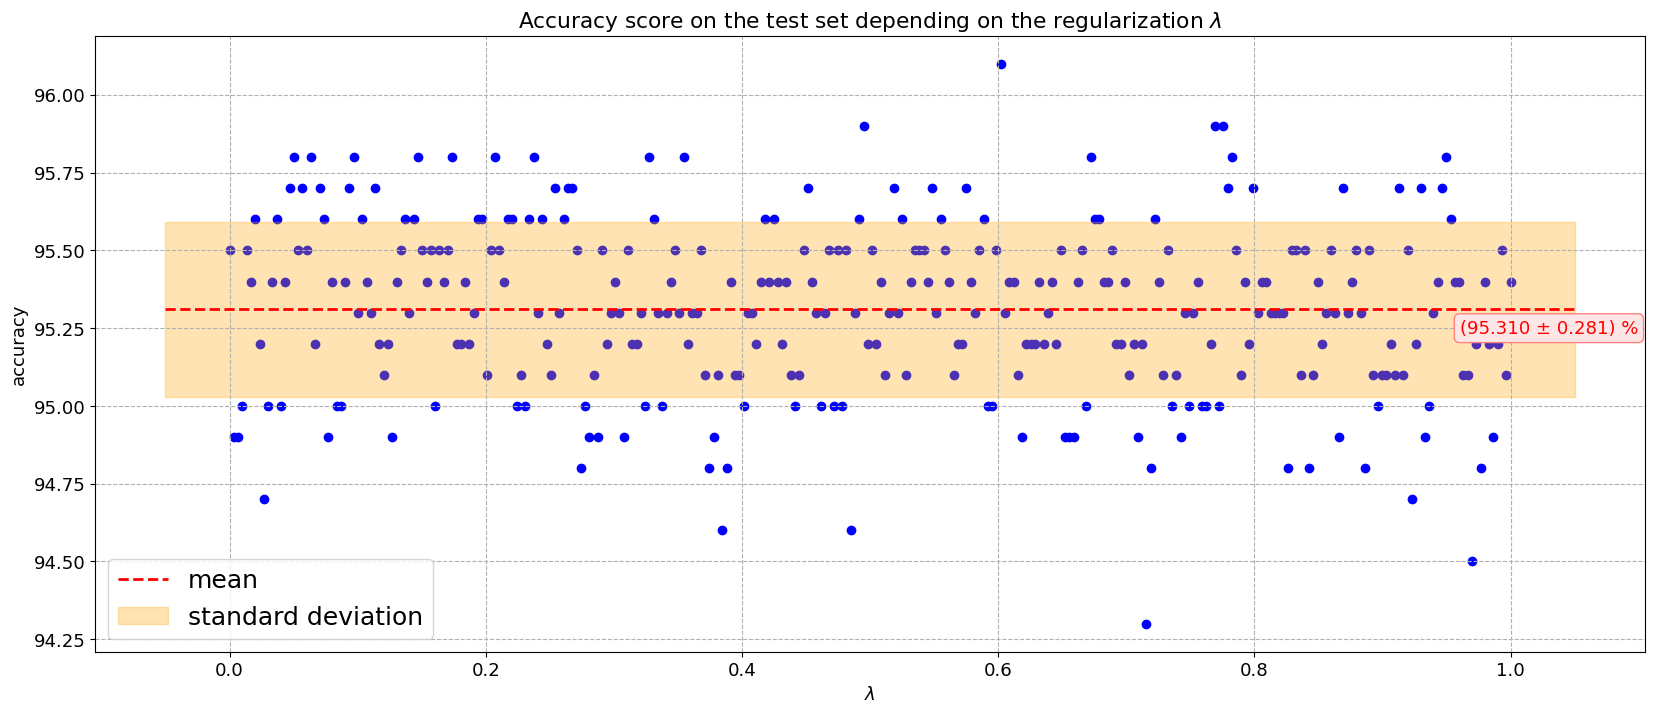

In [25]:
# visualize accuracy trend wrt regularization parameter 

mean = 100*np.mean(accs)
std = 100*np.std(accs)

fig, ax = plt.subplots(figsize=(20, 8))

ax.scatter(lamb, 100*np.array(accs), c='blue')
ax.hlines(mean, -0.05, 1.05, colors='red', linewidth=2, linestyles='--', label='mean')
ax.fill_between(np.linspace(-0.05, 1.05, 200), np.repeat(mean - std, 200) , np.repeat(mean + std, 200), color='orange', alpha=0.3, label='standard deviation')

ax.text(1.03, 95.25, f'({mean:.3f} ± {std:.3f}) %', color='red', ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.9, 0.9),
                   ))
ax.grid(True, linestyle='--')
ax.set_xlabel('$\\lambda$')
ax.set_ylabel('accuracy')
ax.legend(loc='lower left', fontsize=18)

plt.title('Accuracy score on the test set depending on the regularization $\\lambda$')
plt.show()

From the plot above we can observe that accuracy value doesn't follow a highly visible trend: the value tends to oscillates around its mean value and it seems to slightly decrement as $\lambda$ increases. The overall trend is however too noisy to affirm that the application of regularization is useful to improve the performances.

## 2. Dimensionality reduction

Here we apply the best model we found to a reduced dataset: first, we neglected features 2 and 3 because previously we saw that the most important are features 0 and 1. Then we explored all possible combinations and we confirm that the fundamental features are 0 and 1.

In [26]:
# reduced dataset: feature 0 an 1
x_01_test = x_test[:,0:2]
x_01_train = x_train[:,0:2]

best_xgb.fit(x_01_train, y_train)

# prediction
pred01 = best_xgb.predict_proba(x_01_test)[:,1]

# false positive rate and true positive rate
fpr01, tpr01, _ = roc_curve(y_test, pred01)

# area under roc
auc01 = auc(fpr01, tpr01)

# accuracy
acc_red_01 = best_xgb.score(x_01_test, y_test)

print(f'Accuracy on the reduced dataset (features 0 and 1): {acc_red_01*100:.2f}%')

# feature importance
feat_imp01 = np.round(best_xgb.feature_importances_, 3)

Accuracy on the reduced dataset (features 0 and 1): 96.00%


In [27]:
# reduced dataset: feature 1 and 2
x_12_test = x_test[:,1:3]
x_12_train = x_train[:,1:3]

best_xgb.fit(x_12_train, y_train)

# prediction
pred12 = best_xgb.predict_proba(x_12_test)[:,1]

# false positive rate and true positive rate
fpr12, tpr12, _ = roc_curve(y_test, pred12)

# area under roc
auc12 = auc(fpr12, tpr12)

acc_red_12 = best_xgb.score(x_12_test, y_test)

print(f'Accuracy on the reduced dataset (features 1 and 2): {acc_red_12*100:.2f}%')

feat_imp12 = np.round(best_xgb.feature_importances_, 3)

Accuracy on the reduced dataset (features 1 and 2): 58.80%


In [28]:
# reduced dataset: feature 2 and 3
x_23_test = x_test[:,2:4]
x_23_train = x_train[:,2:4]

best_xgb.fit(x_23_train, y_train)

# prediction
pred23 = best_xgb.predict_proba(x_23_test)[:,1]

# false positive rate and true positive rate
fpr23, tpr23, _ = roc_curve(y_test, pred23)

# area under roc
auc23 = auc(fpr23, tpr23)

acc_red_23 = best_xgb.score(x_23_test, y_test)

print(f'Accuracy on the reduced dataset (features 2 and 3): {acc_red_23*100:.2f}%')

feat_imp23 = np.round(best_xgb.feature_importances_, 3)

Accuracy on the reduced dataset (features 2 and 3): 49.80%


In [29]:
# reduced dataset: feature 0, 1 and 2
x_012_test = x_test[:,0:3]
x_012_train = x_train[:,0:3]

best_xgb.fit(x_012_train, y_train)

# prediction
pred012 = best_xgb.predict_proba(x_012_test)[:,1]

# false positive rate and true positive rate
fpr012, tpr012, _ = roc_curve(y_test, pred012)

# area under roc
auc012 = auc(fpr012, tpr012)

acc_red_012 = best_xgb.score(x_012_test, y_test)

print(f'Accuracy on the reduced dataset (features 0, 1 and 2): {acc_red_012*100:.2f}%')

feat_imp012 = np.round(best_xgb.feature_importances_, 3)

Accuracy on the reduced dataset (features 0, 1 and 2): 95.20%


In [30]:
# reduced dataset: feature 1, 2 and 3
x_123_test = x_test[:,1:4]
x_123_train = x_train[:,1:4]

best_xgb.fit(x_123_train, y_train)

# prediction
pred123 = best_xgb.predict_proba(x_123_test)[:,1]

# false positive rate and true positive rate
fpr123, tpr123, _ = roc_curve(y_test, pred123)

# area under roc
auc123 = auc(fpr123, tpr123)

acc_red_123 = best_xgb.score(x_123_test, y_test)

print(f'Accuracy on the reduced dataset (features 0, 1 and 2): {acc_red_123*100:.2f}%')

feat_imp123 = np.round(best_xgb.feature_importances_, 3)

Accuracy on the reduced dataset (features 0, 1 and 2): 59.80%


In [31]:
# reduced dataset: feature 0 and 2
x_02_test = np.stack((x_test[:,0], x_test[:,2]), axis = 1) 
x_02_train = np.stack((x_train[:,0], x_train[:,2]), axis = 1)

best_xgb.fit(x_02_train, y_train)

# prediction
pred02 = best_xgb.predict_proba(x_02_test)[:,1]

# false positive rate and true positive rate
fpr02, tpr02, _ = roc_curve(y_test, pred02)

# area under roc
auc02 = auc(fpr02, tpr02)

acc_red_02 = best_xgb.score(x_02_test, y_test)

print(f'Accuracy on the reduced dataset (features 0 and 2): {acc_red_02*100:.2f}%')

feat_imp02 = np.round(best_xgb.feature_importances_, 3)

Accuracy on the reduced dataset (features 0 and 2): 54.60%


In [32]:
# reduced dataset: feature 0 and 3
x_03_test = np.stack((x_test[:,0], x_test[:,3]), axis = 1) 
x_03_train = np.stack((x_train[:,0], x_train[:,3]), axis = 1)

best_xgb.fit(x_03_train, y_train)

# prediction
pred03 = best_xgb.predict_proba(x_03_test)[:,1]

# false positive rate and true positive rate
fpr03, tpr03, _ = roc_curve(y_test, pred03)

# area under roc
auc03 = auc(fpr03, tpr03)

acc_red_03 = best_xgb.score(x_03_test, y_test)

print(f'Accuracy on the reduced dataset (features 0 and 3): {acc_red_03*100:.2f}%')

feat_imp03 = np.round(best_xgb.feature_importances_, 3)

Accuracy on the reduced dataset (features 0 and 3): 57.00%


In [33]:
# reduced dataset: feature 1 and 3
x_13_test = np.stack((x_test[:,1], x_test[:,3]), axis = 1) 
x_13_train = np.stack((x_train[:,1], x_train[:,3]), axis = 1)

best_xgb.fit(x_13_train, y_train)

# prediction
pred13 = best_xgb.predict_proba(x_13_test)[:,1]

# false positive rate and true positive rate
fpr13, tpr13, _ = roc_curve(y_test, pred13)

# area under roc
auc13 = auc(fpr13, tpr13)

acc_red_13 = best_xgb.score(x_13_test, y_test)

print(f'Accuracy on the reduced dataset (features 1 and 3): {acc_red_13*100:.2f}%')

feat_imp13 = np.round(best_xgb.feature_importances_, 3)

Accuracy on the reduced dataset (features 1 and 3): 61.30%


In [34]:
# reduced dataset: feature 0, 1 and 3
x_013_test = np.stack((x_test[:,0], x_test[:,1], x_test[:,3]), axis = 1)
x_013_train = np.stack((x_train[:,0], x_train[:,1], x_train[:,3]), axis = 1)

best_xgb.fit(x_013_train, y_train)

# prediction
pred013 = best_xgb.predict_proba(x_013_test)[:,1]

# false positive rate and true positive rate
fpr013, tpr013, _ = roc_curve(y_test, pred013)

# area under roc
auc013 = auc(fpr013, tpr013)

acc_red_013 = best_xgb.score(x_013_test, y_test)

print(f'Accuracy on the reduced dataset (features 0, 1 and 3): {acc_red_013*100:.2f}%')

feat_imp013 = np.round(best_xgb.feature_importances_, 3)

Accuracy on the reduced dataset (features 0, 1 and 3): 95.80%


In [35]:
# reduced dataset: feature 0, 2 and 3
x_023_test = np.stack((x_test[:,0], x_test[:,2], x_test[:,3]), axis = 1)
x_023_train = np.stack((x_train[:,0], x_train[:,2], x_train[:,3]), axis = 1)

best_xgb.fit(x_023_train, y_train)

# prediction
pred023 = best_xgb.predict_proba(x_023_test)[:,1]

# false positive rate and true positive rate
fpr023, tpr023, _ = roc_curve(y_test, pred023)

# area under roc
auc023 = auc(fpr023, tpr023)

acc_red_023 = best_xgb.score(x_023_test, y_test)

print(f'Accuracy on the reduced dataset (features 0, 2 and 3): {acc_red_023*100:.2f}%')

feat_imp023 = np.round(best_xgb.feature_importances_, 3)

Accuracy on the reduced dataset (features 0, 2 and 3): 56.50%


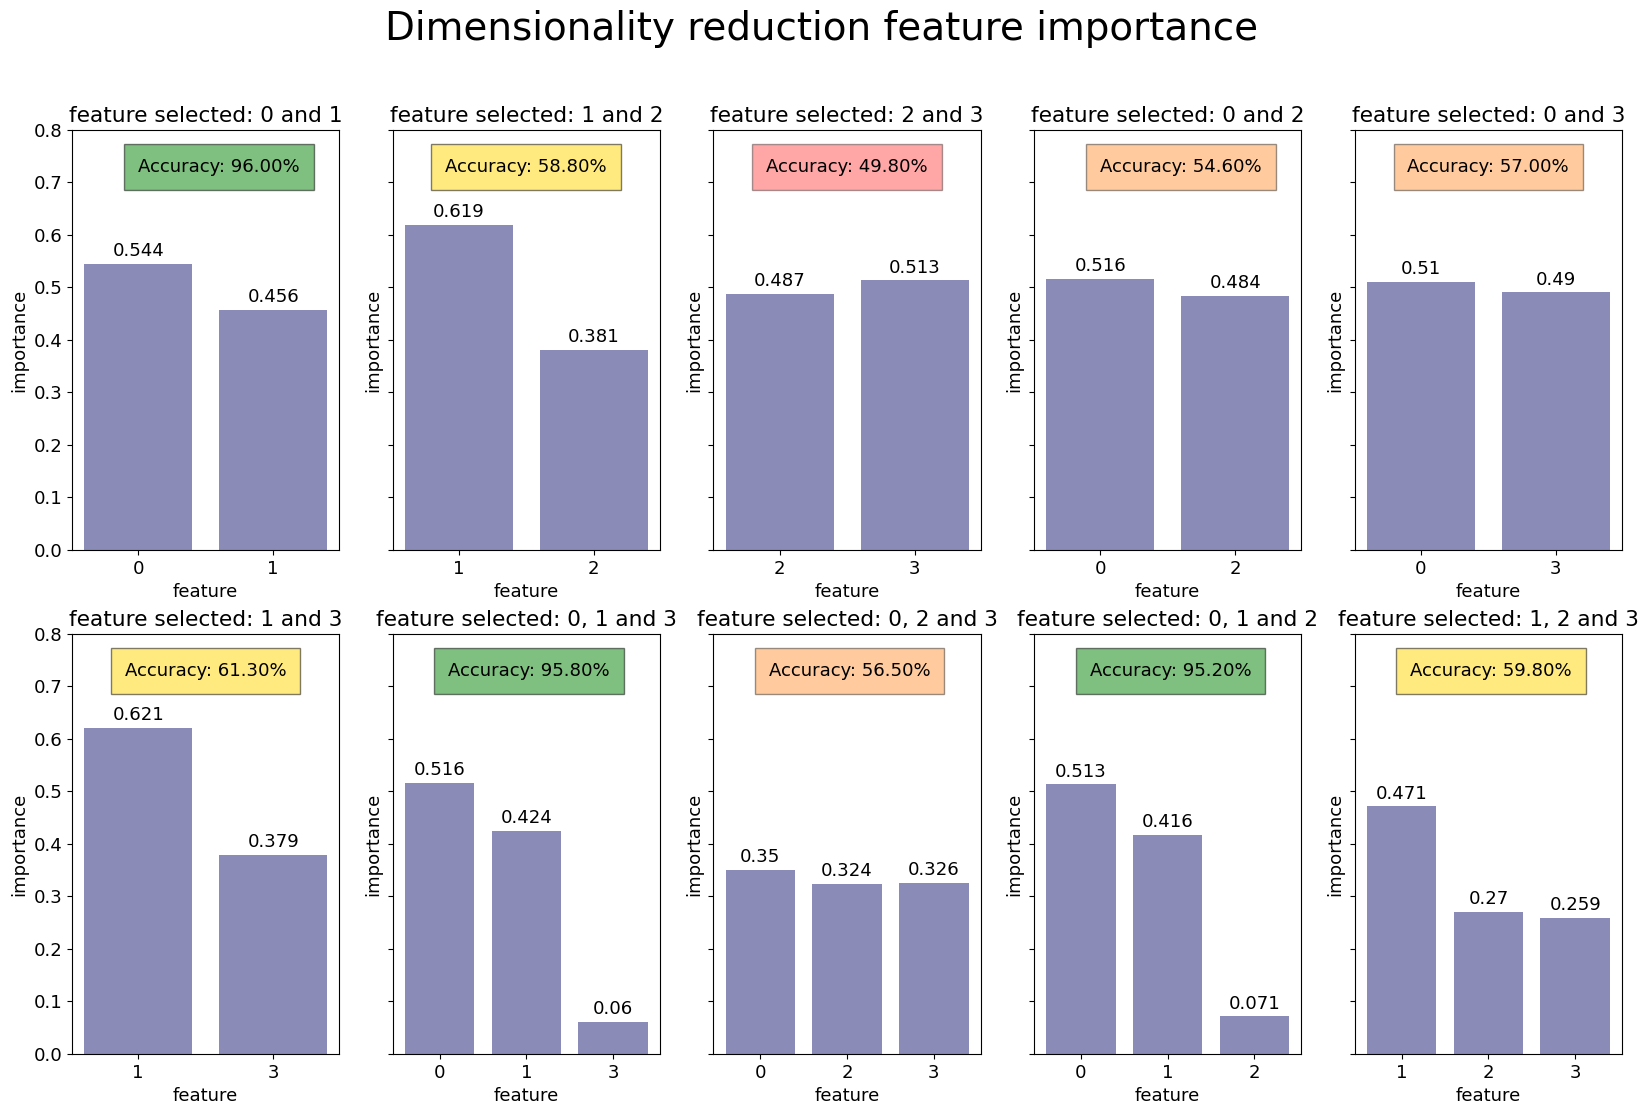

In [58]:
# recap plot
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20,12), sharey='all')

fig.suptitle('Dimensionality reduction feature importance', fontsize=28)

ax[0][0].text(0,0.72, f'Accuracy: {100*acc_red_01:.2f}%', bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10})
r01 = ax[0][0].bar([0,1], feat_imp01, 0.8, color = 'midnightblue', alpha = 0.5)
ax[0][0].bar_label(r01, padding=3)
ax[0][0].set_xticks([0,1], ['0', '1'])
ax[0][0].set_title('feature selected: 0 and 1')
ax[0][0].set_xlabel('feature')
ax[0][0].set_ylabel('importance')
ax[0][0].set_ylim(0,0.75)

ax[0][1].text(0.9,0.72, f'Accuracy: {100*acc_red_12:.2f}%', bbox={'facecolor': 'gold', 'alpha': 0.5, 'pad': 10})
r12 = ax[0][1].bar([1,2], feat_imp12, 0.8, color = 'midnightblue', alpha = 0.5)
ax[0][1].bar_label(r12, padding=3)
ax[0][1].set_xticks([1,2], ['1', '2'])
ax[0][1].set_title('feature selected: 1 and 2')
ax[0][1].set_xlabel('feature')
ax[0][1].set_ylabel('importance')
ax[0][1].set_ylim(0,0.75)

ax[0][2].text(1.9,0.72, f'Accuracy: {100*acc_red_23:.2f}%', bbox={'facecolor': 'red', 'alpha': 0.35, 'pad': 10})
r23 = ax[0][2].bar([2,3], feat_imp23, 0.8, color = 'midnightblue', alpha = 0.5)
ax[0][2].bar_label(r23, padding=3)
ax[0][2].set_xticks([2,3], ['2', '3'])
ax[0][2].set_title('feature selected: 2 and 3')
ax[0][2].set_xlabel('feature')
ax[0][2].set_ylabel('importance')
ax[0][2].set_ylim(0,0.75)

ax[0][3].text(0,0.72, f'Accuracy: {100*acc_red_02:.2f}%', bbox={'facecolor': 'C1', 'alpha': 0.4, 'pad': 10})
r02 = ax[0][3].bar([0,1], feat_imp02, 0.8, color = 'midnightblue', alpha = 0.5)
ax[0][3].bar_label(r02, padding=3)
ax[0][3].set_xticks([0,1], ['0', '2'])
ax[0][3].set_title('feature selected: 0 and 2')
ax[0][3].set_xlabel('feature')
ax[0][3].set_ylabel('importance')
ax[0][3].set_ylim(0,0.75)

ax[0][4].text(0.9,0.72, f'Accuracy: {100*acc_red_03:.2f}%', bbox={'facecolor': 'C1', 'alpha': 0.4, 'pad': 10})
r03 = ax[0][4].bar([1,2], feat_imp03, 0.8, color = 'midnightblue', alpha = 0.5)
ax[0][4].bar_label(r03, padding=3)
ax[0][4].set_xticks([1,2], ['0', '3'])
ax[0][4].set_title('feature selected: 0 and 3')
ax[0][4].set_xlabel('feature')
ax[0][4].set_ylabel('importance')
ax[0][4].set_ylim(0,0.75)

ax[1][0].text(0.9,0.72, f'Accuracy: {100*acc_red_13:.2f}%', bbox={'facecolor': 'gold', 'alpha': 0.5, 'pad': 10})
r13 = ax[1][0].bar([1,2], feat_imp13, 0.8, color = 'midnightblue', alpha = 0.5)
ax[1][0].bar_label(r13, padding=3)
ax[1][0].set_xticks([1,2], ['1', '3'])
ax[1][0].set_title('feature selected: 1 and 3')
ax[1][0].set_xlabel('feature')
ax[1][0].set_ylabel('importance')
ax[1][0].set_ylim(0,0.75)

ax[1][1].text(0.1,0.72, f'Accuracy: {100*acc_red_013:.2f}%', bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10})
r013 = ax[1][1].bar([0,1,2], feat_imp013, 0.8, color = 'midnightblue', alpha = 0.5)
ax[1][1].bar_label(r013, padding=3)
ax[1][1].set_xticks([0, 1,2], ['0','1', '3'])
ax[1][1].set_title('feature selected: 0, 1 and 3')
ax[1][1].set_xlabel('feature')
ax[1][1].set_ylabel('importance')
ax[1][1].set_ylim(0,0.75)

ax[1][2].text(0.1,0.72, f'Accuracy: {100*acc_red_023:.2f}%', bbox={'facecolor': 'C1', 'alpha': 0.4, 'pad': 10})

r023 = ax[1][2].bar([0,1,2], feat_imp023, 0.8, color = 'midnightblue', alpha = 0.5)
ax[1][2].bar_label(r023, padding=3)
ax[1][2].set_xticks([0,1,2], ['0', '2', '3'])
ax[1][2].set_title('feature selected: 0, 2 and 3')
ax[1][2].set_xlabel('feature')
ax[1][2].set_ylabel('importance')
ax[1][2].set_ylim(0,0.75)

ax[1][3].text(0.1,0.72, f'Accuracy: {100*acc_red_012:.2f}%', bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10})
r012 = ax[1][3].bar([0,1,2], feat_imp012, 0.8, color = 'midnightblue', alpha = 0.5)
ax[1][3].bar_label(r012, padding=3)
ax[1][3].set_xticks([0,1,2], ['0', '1', '2'])
ax[1][3].set_title('feature selected: 0, 1 and 2')
ax[1][3].set_xlabel('feature')
ax[1][3].set_ylabel('importance')
ax[1][3].set_ylim(0,0.75)

ax[1][4].text(1.1,0.72, f'Accuracy: {100*acc_red_123:.2f}%', bbox={'facecolor': 'gold', 'alpha': 0.5, 'pad': 10})
r123 = ax[1][4].bar([1,2,3], feat_imp123, 0.8, color = 'midnightblue', alpha = 0.5)
ax[1][4].bar_label(r123, padding=3)
ax[1][4].set_xticks([1,2,3], ['1', '2', '3'])
ax[1][4].set_title('feature selected: 1, 2 and 3')
ax[1][4].set_xlabel('feature')
ax[1][4].set_ylabel('importance')
ax[1][4].set_ylim(0,0.8)

plt.show()

From the feature importance plots, we can first observe that, the winning feature combination is 0 and 1. Moreover, selecting two features out of four, only if feature 1 is selected it results the most important feature. Otherwise, essentially there is not a most important features. However, the accuracy is near to random classifier in all these cases. Then, selecting three features out of four, only if the 0 and 1 feature combination is present we obtain a very good accuracy instead of random classification. Finally, the presence of the sole feature 1 instead of the sole feature 0 (coupled with less important features) is more important.

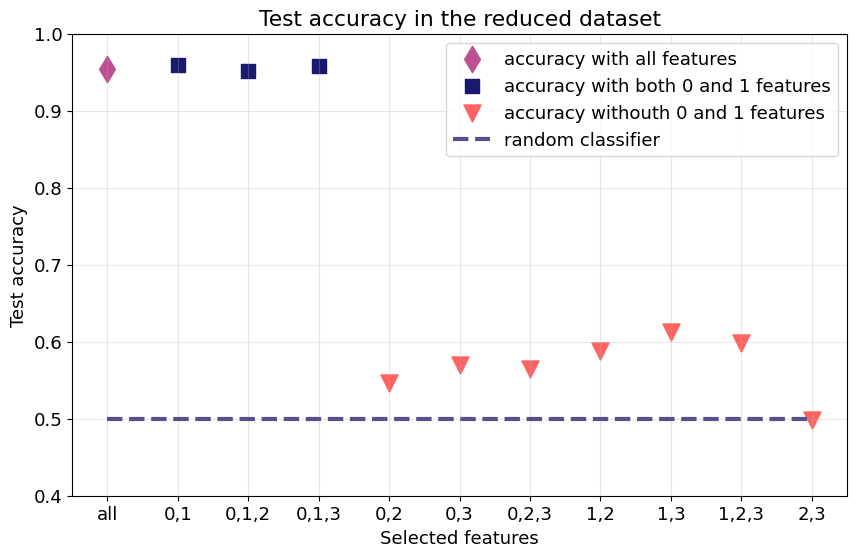

In [41]:
# plot to visualize accuracy in feature combination

f_comb = np.array(['0,1', '0,2', '0,3', '0,1,2', '0,1,3', '0,2,3', '1,2', '1,3', '1,2,3', '2,3'])
accs = np.array([acc_red_01, acc_red_02, acc_red_03, acc_red_012, acc_red_013, acc_red_023, acc_red_12, acc_red_13, acc_red_123, acc_red_23 ])

fig, ax = plt.subplots(figsize = (10,6))
ax.grid(alpha = 0.3)

ax.scatter('all', acc_test, s=180, marker='d', color = "#bc5090" , label = 'accuracy with all features')
ax.scatter(f_comb[accs>0.8], accs[accs>0.8], s=100, marker='s', color = "midnightblue" , label = 'accuracy with both 0 and 1 features')
ax.scatter(f_comb[accs<0.8], accs[accs<0.8], s=150, marker='v', color = "#ff6361" , label = 'accuracy withouth 0 and 1 features')


ax.hlines(0.5, 'all', '2,3', linestyle='dashed', color="#58508d", label = 'random classifier', linewidth=3)
#ffa600
ax.set_xlabel('Selected features')
ax.set_ylabel('Test accuracy')
ax.set_title('Test accuracy in the reduced dataset')
ax.set_ylim(0.4,1)
ax.legend()

plt.show()

From the plot above we can observe that without features (0,1) (chosen together) the accuracy is near to the random classifier one. Moreover, excluding the least important features (2 and 3) and retaining only features 0 and 1 improves the accuracy a little bit with respect to the one obtained with all features, so the training could be performed better and more efficiently (computationally speaking) in this way. Finally, the worst accuracy is obtained with fetures 2 and 3.

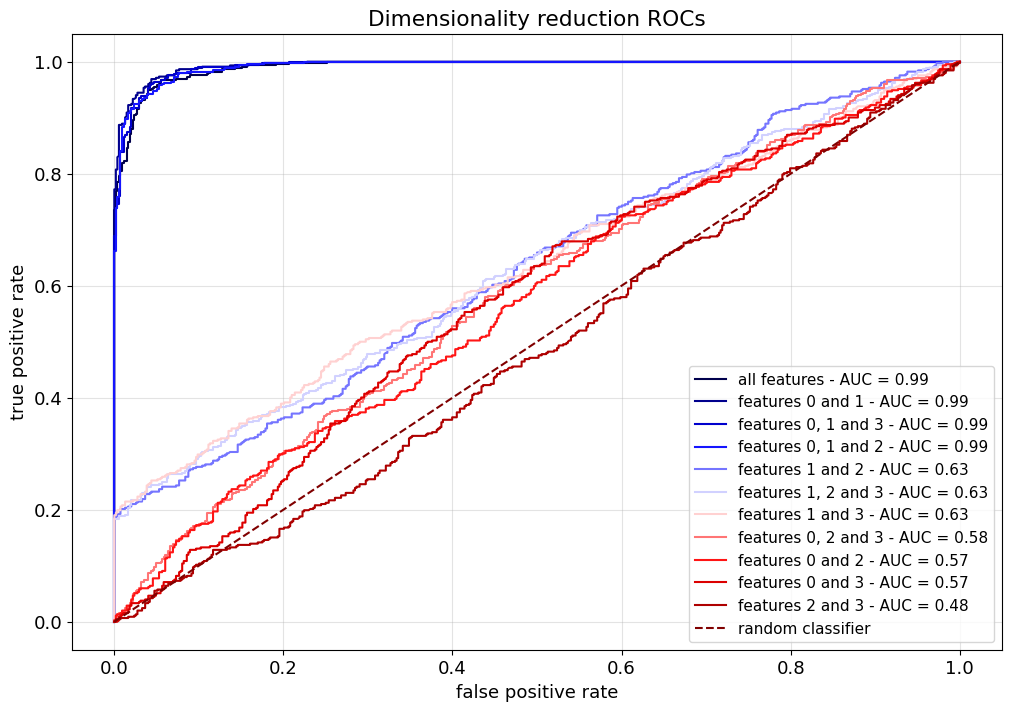

In [43]:
# ROCs plot

fig, ax = plt.subplots(figsize=(12,8))
ax.grid(alpha=0.35)

colors = plt.cm.seismic(np.linspace(0, 1, 12))

ax.plot(fpr_all, tpr_all, label = f'all features - AUC = {auc_all:.2f}', color=colors[0])

ax.plot(fpr01, tpr01, label = f'features 0 and 1 - AUC = {auc01:.2f}', color=colors[1])
ax.plot(fpr013, tpr013, label = f'features 0, 1 and 3 - AUC = {auc013:.2f}', color=colors[2])
ax.plot(fpr012, tpr012, label = f'features 0, 1 and 2 - AUC = {auc012:.2f}', color=colors[3])
ax.plot(fpr12, tpr12, label = f'features 1 and 2 - AUC = {auc12:.2f}', color=colors[4])
ax.plot(fpr123, tpr123, label = f'features 1, 2 and 3 - AUC = {auc123:.2f}', color=colors[5])
ax.plot(fpr13, tpr13, label = f'features 1 and 3 - AUC = {auc13:.2f}', color=colors[6])
ax.plot(fpr023, tpr023, label = f'features 0, 2 and 3 - AUC = {auc023:.2f}', color=colors[7])
ax.plot(fpr02, tpr02, label = f'features 0 and 2 - AUC = {auc02:.2f}', color=colors[8])
ax.plot(fpr03, tpr03, label = f'features 0 and 3 - AUC = {auc03:.2f}', color=colors[9])
ax.plot(fpr23, tpr23, label = f'features 2 and 3 - AUC = {auc23:.2f}', color=colors[10])
ax.plot(np.linspace(0,1,50), np.linspace(0,1,50), label = 'random classifier', color = colors[11], linestyle = '--')

ax.legend(fontsize=11)
ax.set_title('Dimensionality reduction ROCs')
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')

plt.show()

From ROCs we can confirm what we observed before: the combination of features 0 and 1 is essential to perform a good classification and the best ROC is obtained with only 0 and 1 features, discarding features 2 and 3. Moreover, the presence of the feature 1 makes the classifier to perform a great start, but feature 1 alone without feature 0 cannot solve the task completely. Finally, the remaining combinations are also worst than the random classifier, and this means that the training is pointless in these cases. The worst performance in terms of ROC AUC is obtained with features 2 and 3 only. 